In [13]:
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(color_codes=True)

import matplotlib
from wordcloud import WordCloud

sns.set_style('dark')

In [2]:
df=pd.read_csv('vgsales.csv',sep=',')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


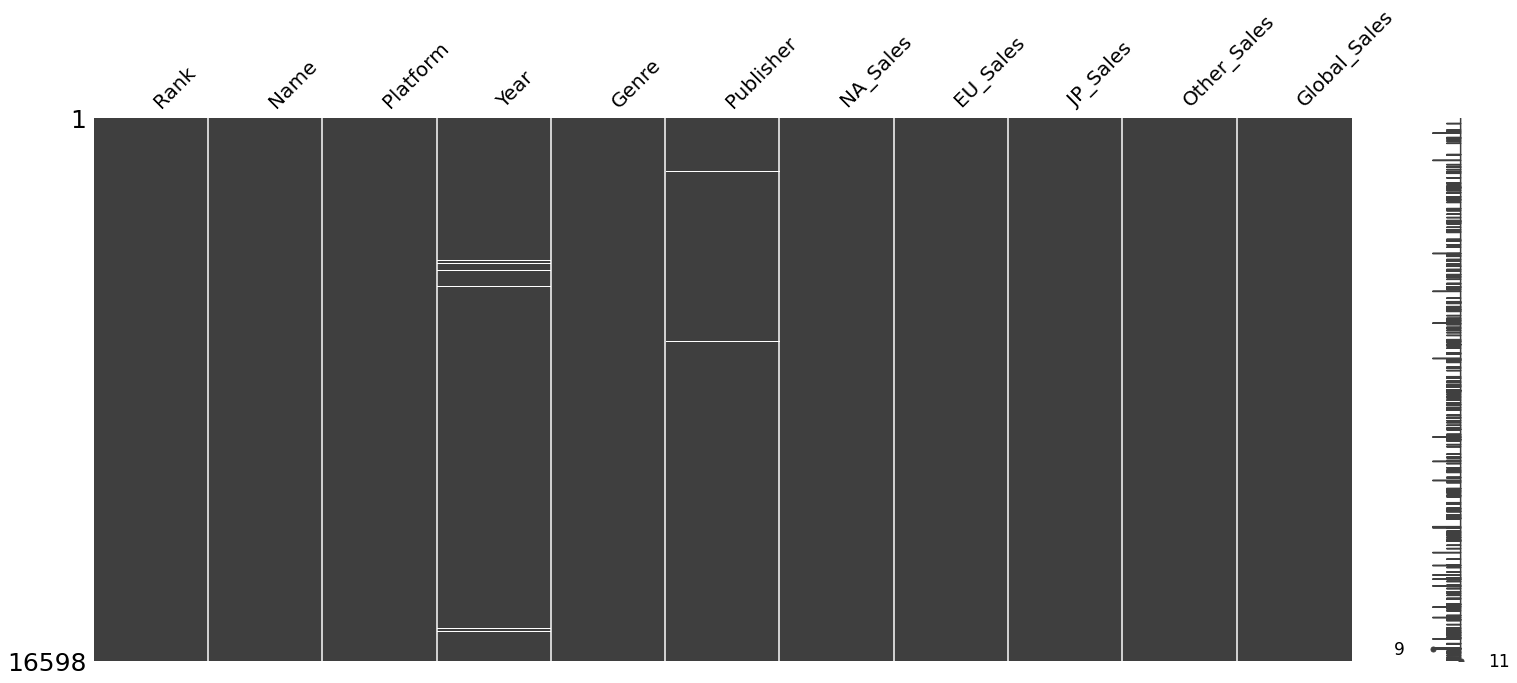

In [7]:
msno.matrix(df,fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

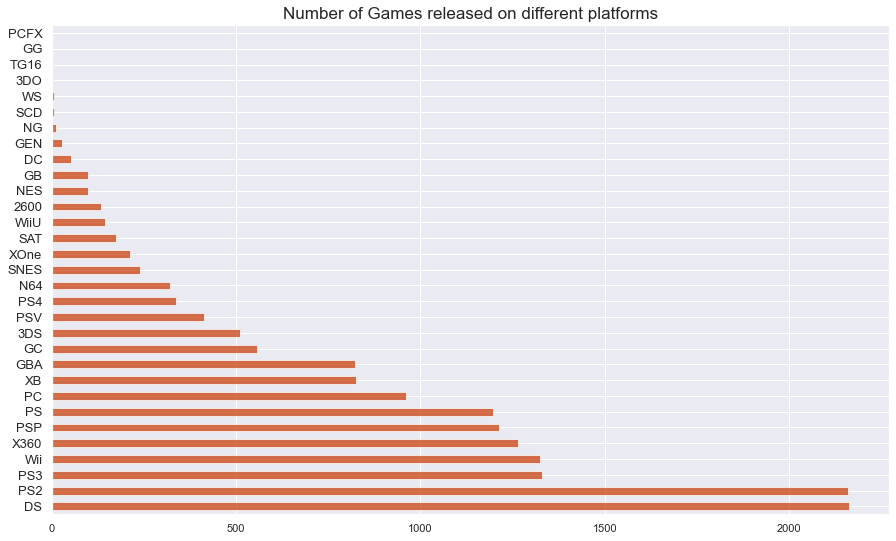

In [13]:
df.Platform.value_counts().plot(kind='barh',figsize=(15,9),alpha=.7,color='#c93500')
plt.title('Number of Games released on different platforms',fontsize=17)
plt.yticks(fontsize=13)

In [12]:
df.Genre.value_counts().index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1fefe8f7dd8>,
 [Text(0.9308299260793407, 0.6753189237057774, 'Action'),
  Text(-0.14098088951152532, 1.0909282234833506, 'Sports'),
  Text(-0.8628261066951454, 0.6822984021711452, 'Misc'),
  Text(-1.0981313409109585, 0.06409023411644078, 'Role-Playing'),
  Text(-0.9800788430959432, -0.4994451534610361, 'Shooter'),
  Text(-0.6284777724368498, -0.9027821938611857, 'Adventure'),
  Text(-0.14077451297515953, -1.09095487372146, 'Racing'),
  Text(0.29952111976020795, -1.058436157176044, 'Platform'),
  Text(0.6279649450683688, -0.9031389858517243, 'Simulation'),
  Text(0.8832142054986449, -0.65569250964564, 'Fighting'),
  Text(1.033606467004216, -0.3763743766080029, 'Strategy'),
  Text(1.09333257635814, -0.12092922506190083, 'Puzzle')])

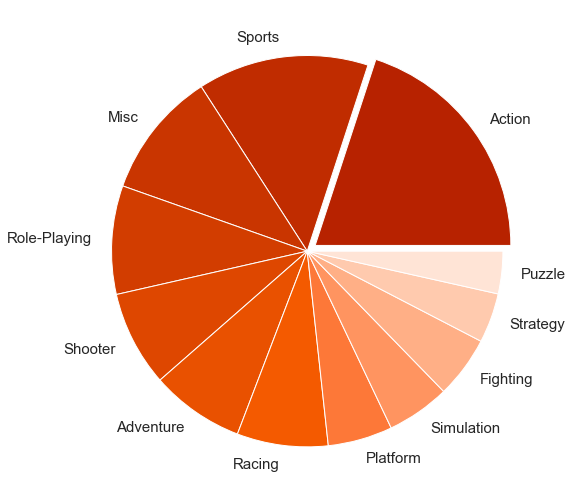

In [17]:
plt.figure(figsize=(9,9))
plt.pie(x=df.Genre.value_counts(),labels=df.Genre.value_counts().index,
        colors=['#b72200','#c02c00','#c93500','#d23d00','#de4700', '#e95100', '#f45a00', '#fd7838','#ff9460', '#ffaf86', '#ffcaae', '#ffe4d6'],
        explode=[.05,0,0,0,0,0,0,0,0,0,0,0],textprops={'fontsize':15})


In [9]:
df[['Name','Global_Sales']]

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


In [11]:
for index, row in df[['Name','Global_Sales']].iterrows():
    print(row['Name'])

Wii Sports
Super Mario Bros.
Mario Kart Wii
Wii Sports Resort
Pokemon Red/Pokemon Blue
Tetris
New Super Mario Bros.
Wii Play
New Super Mario Bros. Wii
Duck Hunt
Nintendogs
Mario Kart DS
Pokemon Gold/Pokemon Silver
Wii Fit
Wii Fit Plus
Kinect Adventures!
Grand Theft Auto V
Grand Theft Auto: San Andreas
Super Mario World
Brain Age: Train Your Brain in Minutes a Day
Pokemon Diamond/Pokemon Pearl
Super Mario Land
Super Mario Bros. 3
Grand Theft Auto V
Grand Theft Auto: Vice City
Pokemon Ruby/Pokemon Sapphire
Pokemon Black/Pokemon White
Brain Age 2: More Training in Minutes a Day
Gran Turismo 3: A-Spec
Call of Duty: Modern Warfare 3
Pokémon Yellow: Special Pikachu Edition
Call of Duty: Black Ops
Pokemon X/Pokemon Y
Call of Duty: Black Ops 3
Call of Duty: Black Ops II
Call of Duty: Black Ops II
Call of Duty: Modern Warfare 2
Call of Duty: Modern Warfare 3
Grand Theft Auto III
Super Smash Bros. Brawl
Call of Duty: Black Ops
Animal Crossing: Wild World
Mario Kart 7
Halo 3
Grand Theft Auto V
Po

NBA Street
Professor Layton and the Last Specter
Monster Hunter Tri
Jak II
inFAMOUS: Second Son
Ratchet & Clank: Going Commando
Tekken 6
The Sims
Sonic and the Secret Rings
Saints Row: The Third
Missile Command
Mario Paint
Assassin's Creed IV: Black Flag
Pokémon Stadium 2
Metroid
L.A. Noire
Call of Duty 3
The Legend of Zelda: A Link to the Past
Onimusha: Warlords
Mortal Kombat X
Mario Party
Madden NFL 12
LEGO Star Wars II: The Original Trilogy
Madden NFL 11
Mario vs. Donkey Kong: Mini-Land Mayhem!
Skate 3
Burnout 3: Takedown
Yokai Watch 2 Shinuchi
Need for Speed: Shift
Final Fantasy XIII-2
Mortal Kombat
Call Of Duty 2: Big Red One
Guitar Hero: World Tour
Medal of Honor
Fable
Hannah Montana
Tom Clancy's Splinter Cell
Skylanders Giants
Medal of Honor Heroes
Super Mario Bros.: The Lost Levels
Star Wars: Shadows of the Empire
LEGO Star Wars: The Complete Saga
Midnight Club: Street Racing
Pac-Man: Adventures in Time
Halo Wars
God of War Collection
ESPN NFL 2K5
Mario Strikers Charged
Medal o

The Order: 1886
The Elder Scrolls Online
Call of Duty: World at War Final Fronts
Imagine: Teacher
Call of Duty: Modern Warfare 3
Madden NFL 2005
Star Ocean: Till The End of Time
The Sims 3: Late Night Expansion Pack
Game Party 3
Toy Story 2: Buzz Lightyear to the Rescue!
Deal or No Deal
Ace Combat 5: The Unsung War
Need for Speed Underground
Kanshuu Nippon Joushikiryoku Kentei Kyoukai: Imasara Hito ni wa Kikenai Otona no Joushikiryoku Training DS
Tetris Worlds
Cabela's Big Game Hunter 2010
The Crew
FIFA Soccer 10
We Ski
Personal Trainer: Math
Kirby's Return to Dreamland
Super Puyo Puyo
Ben 10: Protector of Earth
NCAA Football 07
SOCOM 3: U.S. Navy SEALs
NBA 2K15
Saints Row 2
Saints Row IV
Jampack Winter '99
Dragon Age: Origins
FIFA 16
WCW vs. nWo: World Tour
WCW/NWO Thunder
Harry Potter and the Sorcerer's Stone
Need For Speed: Undercover
Dragon Ball Z: The Legacy of Goku
Sid Meier's Civilization V
Resident Evil 4
Call of Duty Black Ops: Declassified
Star Wars Battlefront: Renegade Squa

Pirates of the Caribbean: The Curse of the Black Pearl
Transformers
Guitar Hero: Aerosmith
Mystery Case Files: MillionHeir
Valkyria Chronicles
Midnight Club 3: DUB Edition (America weekly sales)
Champions of Norrath
Watch Dogs
Imagine: Wedding Designer
Metal Gear Solid V: Ground Zeroes
Yakuman
Assassin's Creed Syndicate
Army Men 3D
WWE '13
Twisted Metal 4
Manhunt
Kid Icarus: Uprising
Silent Hill 2
Tomb Raider: Underworld
Castlevania: Symphony of the Night
The Sims 2: Nightlife
LEGO Batman: The Videogame
Road Rash
Pokemon Mystery Dungeon: Gates to Infinity
Atlantis
NBA 2K9
WWE '12
Tony Hawk's Underground
Hogan's Alley
The Elder Scrolls Online
Jillian Michaels' Fitness Ultimatum 2009
.hack//Infection Part 1
Rockstar Games presents Table Tennis
Sonic Adventure DX: Director's Cut
Jet Li: Rise to Honor
Battle Arena Toshinden
Yokai Watch 3
Kung Fu Panda
Tamagotchi Connection: Corner Shop
Football Manager 2011
Devil Dice
Final Fantasy IV
Hyrule Warriors
Need for Speed Carbon
Championship Mana

The Simpsons Game
Tiger Woods PGA Tour 2002
Rhythm Heaven
Mini-Yonku Shining Scorpion: Let's & Go!!
MLB 2005
SOCOM 4: U.S. Navy SEALs
Burnout Revenge
Buzz! Quiz TV
We Ski & Snowboard
Destruction Derby
TouchMaster 2
Crysis 3
3Xtreme
Hot Shots Tennis
Sonic Heroes
Resistance: Retribution
Tiger Woods PGA Tour 12: The Masters
Star Wars: The Force Unleashed
Madden NFL 99
Spider-Man 3
James Bond 007: Agent Under Fire
Samba De Amigo
The Elder Scrolls Online
Pure
FIFA Soccer 09 All-Play
Fossil Fighters
LittleBigPlanet Karting
X-Men Legends
NBA Live 2005
Harry Potter: Quidditch World Cup
The Biggest Loser: Ultimate Workout
Madagascar
Call of Juarez: Bound in Blood
Killzone: Liberation
Madden NFL 08
Blitz: The League
LEGO Jurassic World
Castlevania: Circle of the Moon
Sonic Chronicles: The Dark Brotherhood
Tiger Woods PGA Tour 06
Classic NES Series: The Legend of Zelda
The Jak and Daxter Collection
Fire Emblem: The Sacred Stones
Pokemon Card GB2: Here Comes Team GR!
Finding Nemo
CSI: Hard Evidenc

God Eater
Final Fantasy XIV: A Realm Reborn
SD Gundam G Generation
Area 51
NBA Live 08
Dead to Rights
Tiger Woods PGA Tour 07
Test Drive 6
Kouchuu Ouja Mushi King
LEGO Harry Potter: Years 5-7
Major League Baseball 2K7
X-Men: Mutant Academy 2
Terraria
Jampack Winter 2001
Kangaroo
James Bond 007: Blood Stone
Ben 10: Protector of Earth
Skate
Super Monkey Ball Jr.
Driver: San Francisco
MLB 09: The Show
Monster Hunter Tri
Mobile Suit Gundam: Encounters in Space
Catherine
Fear Effect
FIFA Soccer 11
Crysis
Battlefield: Bad Company 2
The Lord of the Rings: The Two Towers
Madden NFL 2003
Dragon Quest Swords: The Masked Queen and the Tower of Mirrors
MLB 13: The Show
Omerta: City of Gangsters
Dragon Quest Heroes: The World's Tree Woe and the Blight Below
Virtua Fighter 4: Evolution
Top Spin 4
Resident Evil: Survivor
Dynasty Warriors 6
Super Trucks Racing
Persona Q: Shadow of the Labyrinth
Madden NFL 08
Godzilla: Destroy All Monsters Melee
Jeremy McGrath Supercross 2000
Conker: Live And Reloaded


Formula 1: Championship Edition
Muramasa: The Demon Blade
NBA 2K9
SingStar Singalong With Disney
NHL 16
Plants vs. Zombies: Garden Warfare
NFL Fever 2003
Samurai Warriors 2
Dynasty Warriors 8
Disney Sing It: Family Hits
2 Games in 1: Sonic Battle & ChuChu Rocket!
Robotech: Battlecry
Dora the Explorer: Super Spies
New Carnival Games
Tony Hawk: RIDE
Just Dance 2014
Cooking Mama 4: Kitchen Magic!
Texas Hold 'Em Poker
Time Crisis 3
Cabela's Monster Buck Hunter
Ganbaru Watashi no Kakei Diary
pro evolution soccer 2011
New Play Control! Donkey Kong Jungle Beat
Small Soldiers
Yakuza: Dead Souls
Littlest Pet Shop: Garden
Half-Life 2
Duke Nukem: Total Meltdown
Pac-Man Party
Jak and Daxter: The Lost Frontier
Major League Baseball 2K8
SimCity DS
Major League Baseball 2K9
Petz: Dogz Pack
Split/Second
Final Fantasy IV Advance
Madden NFL 2003
Tomb Raider Chronicles
Harry Potter and the Goblet of Fire
Dragon Ball Z: Buu's Fury
Madden NFL 2002
Guitar Hero: Smash Hits
Disney TH!NK Fast: The Ultimate Tri

Terminator Salvation
Cars 2
Bratz: Rock Angelz
How to Train Your Dragon
SSX Tricky
WWE SmackDown vs. Raw 2010
Greg Hastings' Tournament Paintball
Hello Kitty: Big City Dreams
Star Fox Command
World Soccer Winning Eleven 7 International (JP version)
ESPN NBA Basketball
Inazuma Eleven GO
Over the Hedge
Mat Hoffman's Pro BMX
Lego Star Wars: The Force Awakens
Epic Mickey 2: The Power of Two
Popeye
Magician's Quest: Mysterious Times
The Hobbit
War of the Monsters
Tales of Symphonia: Dawn of the New World
NBA Street Vol. 2
The Incredible Hulk: Ultimate Destruction
Star Wars Battlefront (2015)
Sakura Taisen 2 - Kimi, Shinitamou Koto Nakare
Jewel Master Egypt
Time Crisis II
Clock Tower
NCAA March Madness 06
SpongeBob SquarePants featuring Nicktoons: Globs of Doom
Jampack Volume 11
Dragon's Crown
Tactics Ogre: Let Us Cling Together
Legacy of Kain: Defiance
SpongeBob SquarePants: Game Boy Advance Video Volume 2
NCAA March Madness 2005
007 Racing
Conflict: Vietnam
2 in 1 Combo Pack: Sonic Heroes 

Enter the Matrix
Crash: Mind Over Mutant
NASCAR 2005: Chase for the Cup
J-League Excite Stage '95
The New York Times Crosswords
Phantasy Star Online Episode I & II
Moshi Monsters: Moshlings Theme Park
The Powerpuff Girls: Relish Rampage
Resistance: Burning Skies
NBA 2K13
Dead or Alive: Dimensions
The Chronicles of Riddick: Escape from Butcher Bay
Brain Challenge
NFL Head Coach
Watch Dogs
Karaoke Revolution Presents American Idol Encore
Major League Baseball 2K11
Enemy Territory: Quake Wars
Ghostbusters
NCAA Gamebreaker 99
Area 51
World Stadium 2
Sega Rally Revo
NHL 2005
TNA iMPACT!
Star Wars Jedi Knight: Jedi Academy
Thrillville: Off the Rails
Phoenix
Spider-Man: Shattered Dimensions
F.E.A.R. 3
My Fashion Studio
Plants vs. Zombies: Garden Warfare 2
Rock Band Country Track Pack
Pro Evolution Soccer 2016
Apocalypse
Transformers: Revenge of the Fallen (Wii & PS2 Version)
PES 2009: Pro Evolution Soccer
Yu-Gi-Oh! Destiny Board Traveler
SingStar Queen
God Eater 2
Samurai Warriors 3
World Soc

Yu-Gi-Oh! 5D's Stardust Accelerator: World Championship 2009
Warriors Orochi 2 (JP sales)
WWE SmackDown! vs. RAW 2006
The Chronicles of Narnia: Prince Caspian
The Incredibles: Rise of the Underminer
Pet in TV
Battalion Wars
NBA ShootOut 2000
Power Rangers: Dino Thunder
Rocksmith 2014
Samurai Shodown
NHL 15
TMNT
Final Fantasy Crystal Chronicles: The Crystal Bearers
Cabela's Big Game Hunter 2010
EA Sports UFC 2
Fighting Vipers
NCAA GameBreaker 2000
Iron Man 2
The Legend of Spyro: Dawn of the Dragon
AKB1/48: Idol to Guam de Koishitara...
RR64: Ridge Racer 64
Top Gear Rally
NFL Quarterback Club 2000
Mortal Kombat Mythologies: Sub-Zero
18 Wheeler: American Pro Trucker
Atari Anthology
Bugs Bunny: Lost in Time
NBA Jam
Sherlock Holmes: The Mystery of the Mummy
Hot Wheels: Beat That!
MLB 2006
Star Wars The Clone Wars: Republic Heroes
Brunswick Pro Bowling
Mafia II
Rocket Power: Dream Scheme
SpongeBob's Truth or Square (US sales)
MX vs. ATV Unleashed
Rampage: Total Destruction
Planet 51
The Urbz

Mega Man Zero Collection
Arctic Thunder
G-Force
NHL 2K10
Football Manager Handheld 2010
J-League Pro Soccer Club o Tsukurou!
Wonder Pets! Save the Animals!
Formula 1 Championship Edition
Shrek
CSI: Deadly Intent - The Hidden Cases
SOCOM: Tactical Strike
Blasto
Trauma Center: Second Opinion
Backyard Baseball 2006
Dark Souls III
Cabela's Outdoor Adventures (2006)
Nicktoons: Unite!
Suikoden V
Picross 2
Remember Me
Battalion Wars 2
Outlaw Golf 2
SpongeBob's Boating Bash
Sentouchu: Densetsu no Shinobi to Survival Battle!
Vancouver 2010 - The Official Video Game of the Olympic Winter Games
Momotarou Dentetsu 12
Mini Ninjas
Tekken Tag Tournament 2
Batman: Rise of Sin Tzu
Disney's Tarzan: Return to the Jungle
Cabela's Dangerous Hunts
Terminator Salvation
Jikkyou Powerful Pro Yakyuu 13
Fossil Fighters: Frontier
Star Fox: Zero
Mega Man X3
Mini Ninjas
Stunt Race FX
Bloody Roar 3
WWE Crush Hour
Persona 2: Eternal Punishment
Star Wars: Flight of the Falcon
One Piece: Gigant Battle 2 Shin Sekai
Pac-

Football Manager 2016
Naruto: Ninja Destiny (US sales)
TRON: Evolution
Disney Infinity 3.0
Taiko Drum Master: Don and Katsu's Space-Time Great Adventure
Calvin Tucker's Redneck Jamboree
MySims SkyHeroes
J-League Winning Eleven 2007: Club Championship
Shrek's Carnival Craze Party Games
Harvest Moon: Magical Melody
Star Wars Jedi Knight II: Jedi Outcast
Yu-Gi-Oh! 5D's World Championship 2010 Reverse of Arcadia
Mega Man Battle Network 2
Little King's Story
Mountain King
Jampack Volume 12
Madagascar
Tiger Woods PGA Tour 06
Shaun White Snowboarding
Shin Megami Tensei: Devil Summoner - Soul Hackers
Major League Baseball 2K8
Rapala Pro Bass Fishing 2010
Lord of the Rings: Battle for Middle-Earth
Demolition Racer
Midway Arcade Treasures 2
Final Fantasy IV
Math Play
Kingdoms of Amalur: Reckoning
NASCAR Thunder 2003
SD Gundam G Generation: Overworld
Sorcery
TouchMaster: Connect
NHL FaceOff 2000
Star Wars Racer Revenge
NBA Live 08
The King of Fighters XIII
NCAA Final Four 2002
South Park: Chef's 

NASCAR 06: Total Team Control
Bratz: The Movie
BloodRayne 2
Spider-Man: Web of Shadows
NHL 2002
Reader Rabbit Kindergarten
Tropico 4
NBA In The Zone '98
Jikkyou Powerful Pro Yakyuu 5
NBA Jam 99
Shadow Man
Command & Conquer
Call of Juarez: The Cartel
Shadow of Rome
Tohoku Daigaku Karei Igaku Kenkyuusho - Kawashima Ryuuta Kyouju Kanshuu - Mono Sugoku Nou o Kitaeru 5-Funkan no Oni Training
Tales of Eternia
Harry Potter and the Order of the Phoenix
Ben 10 Triple Pack
Need for Speed Rivals
Stuntman: Ignition
Fantastic 4
Mat Hoffman's Pro BMX
MotoGP
The Penguins of Madagascar
Summer Athletics: The Ultimate Challenge (US sales)
Rock Revolution
Etrian Odyssey II: Heroes of Lagaard
LEGO The Hobbit
Jikkyou Powerful Pro Yakyuu 2
The Incredible Hulk
Resident Evil: Revelations
Major League Baseball 2K10
NASCAR 2011: The Game
Thoroughbred Breeder II
Shin Megami Tensei: Devil Survivor
Magical Vacation
XGIII: Extreme G Racing
NBA Live 2004
Dragon Ball: XenoVerse
NASCAR Thunder 2003
Section 8
Superbike

Yakuza Zero: The Place of Oath
Prince of Persia: The Forgotten Sands
Dynasty Warriors 6
Imagine: Zookeeper
Porky's
America's Army: Rise of a Soldier
Grandia
TV Superstars
Armored Core 4
F1 2000
Littlest Pet Shop: Country Friends
Dood's Big Adventure
Pirates of the Caribbean: The Legend of Jack Sparrow
We Love Golf!
WRC: World Rally Championship
Ed, Edd n Eddy: The Mis-Edventures
Cars: Mater-National Championship
Dreamworks Madagascar Kartz
Harry Potter and the Order of the Phoenix
Anno 2205
Dune 2000
Cradle of Rome
Monster Hunter G
Fuel
Hasbro Family Game Night 3
Pro Evolution Soccer 2014
Project Overkill
Jumping Flash! 2
Nickelodeon Party Blast
SBK Superbike World Championship
Final Fantasy XI: Chains of Promathia
Choro Q2
Disney's A Christmas Carol
Butt Ugly Martians: B.K.M. Battles
Major League Baseball 2K7
X-Men Legends II: Rise of Apocalypse
Sorry! / Aggravation / Scrabble Junior
Driver '76
Turning Point: Fall of Liberty
NBA Courtside 2002
How to Train Your Dragon 2
The Adventures

Hatsune Miku: Project Mirai 2
Skies of Arcadia Legends
Cloudy With a Chance of Meatballs
MotoGP 08
Madden NFL 12
Sengoku Basara 3 Utage
Breath of Fire
Ragnarok DS
Ford vs. Chevy
NCAA Football 2005
Hamtaro: Ham-Ham Games
Danny Phantom: The Ultimate Enemy
Petz Rescue: Endangered Paradise
MotoGP 09/10
Rune Factory: Tides of Destiny
A Boy and His Blob
Battleborn
Move Fitness
Atelier Escha & Logy: Alchemists of the Dusk Sky
Hidden Mysteries: Buckingham Palace
Crazy Climber
Super Adventure Island
Bust-A-Move 4
The Legend of Spyro: The Eternal Night
NFL Quarterback Club 97
Rampage: Total Destruction
Galactic Wrestling: Featuring Ultimate Muscle
Petz: Horse Club
Dino Stalker
Rapala's Fishing Frenzy
Mobile Suit Gundam Seed
Shinobi
Puss in Boots
Tony Hawk's Downhill Jam
Mega Man Zero 3
LEGO The Lord of the Rings
Hitman: HD Trilogy
Aliens vs Predator: Requiem
Castlevania: Lords of Shadow 2
Barbie: Groom and Glam Pups
KORG DS-10 Synthesizer
Tenchu: Shadow Assassins
Barbie Super Sports
CSI: Fatal C

Hot Wheels: Track Attack
Schlag den Raab
UFC Personal Trainer: The Ultimate Fitness System
Total War: Shogun 2 - Fall of the Samurai
The BIGS 2
Mat Hoffman's Pro BMX 2
Treasure Hunter G
Untold Legends: Dark Kingdom
From Russia With Love
Wing Arms
Dead Space 3
Pro Yaky? Spirits 2013
We Wish You A Merry Christmas
BioShock The Collection
DanceDanceRevolution
Cabela's Big Game Hunter (2008)
Grandia II
Namco Museum Vol.4
The Cheetah Girls: Passport to Stardom
UFC Personal Trainer: The Ultimate Fitness System
How to Train Your Dragon 2
Shark Tale
NFL Street 2
Pro Yaky? Spirits 2013
Teenage Mutant Ninja Turtles 3: Mutant Nightmare
My Secret World by Imagine
Soldier of Fortune: Payback
Ridge Racer
Bleach: The 3rd Phantom
Gladius
Family Feud: 2012 Edition
Dave Mirra Freestyle BMX 2
Spore Hero Arena
Pro Yaky? Spirits 2012
Puzzle & Dragons X: God Chapter / Dragon Chapter
SpongeBob SquarePants: Revenge of the Flying Dutchman
Record of Agarest War
Baja: Edge of Control
Sid Meier's Pirates!
Taiko no

NARC
Naruto Shippuden: Dragon Blade Chronicles
Dynasty Warriors 8: Empires
Super Robot Taisen J
Evolve
Nep League DS
Ar tonelico 2: Melody of Metafalica
de Blob 2
Lips: Party Classics
Casper: Friends Around the World
Borderlands
Jurassic Park III: Island Attack
Chaotic: Shadow Warriors
Ghostbusters: The Video Game
GameBoy Wars
Amplitude
Alone in the Dark
Company of Heroes: Anthology
Shape Up
Gauntlet: Seven Sorrows
AirForce Delta Storm
Trauma Team
Monopoly Party
Fear Effect 2: Retro Helix
How to Train Your Dragon
Remember Me
International Superstar Soccer 2000 (JP weekly sales)
Chocobo no Fushigi Dungeon for WonderSwan
Klonoa: Door to Phantomile
Vietcong: Purple Haze
Hitman: HD Trilogy
Atari Anniversary Advance
Summer Athletics: The Ultimate Challenge
Driver: San Francisco
Metal Gear Ac!d 2
Hatsune Miku and Future Stars: Project Mirai
Let's TAP
X-Men Origins: Wolverine
TalkMan (Japan)
Cabela's Adventure Camp
LEGO Marvel's Avengers
Bloody Roar: Primal Fury
Shrek SuperSlam
We Sing UK Hit

The Legend of Heroes VII: The Trail of Zero
Warriors Orochi 3
King's Field
Hannah Montana: Rock Out the Show
Let's Ride: Sunshine Stables
World Stadium 4
Midway Arcade Treasures 2
Hot Wheels World Race
San Goku Shi Taisen DS
Kawa no Nushi Tsuri
N2O: Nitrous Oxide
Magic: The Gathering - Battlegrounds
Heroes over Europe
Dancing With The Stars
Major League Baseball 2K12
Pro Evolution Soccer 2015
Bladestorm: Nightmare
Otogirisou
SD Gundam G Generation 3D
Crash Tag Team Racing
Grease Dance
Ready 2 Rumble Revolution
My Baby 3 & Friends
NASCAR '14
TimeSplitters: Future Perfect
Midway Arcade Treasures 3
Dr. Muto
Beowulf: The Game
Puzzle Quest: Galactrix
DS Rakubiki Jiten
SeaWorld Adventure Parks: Shamu's Deep Sea Adventure
Fatal Frame II: Crimson Butterfly
Angry Birds Trilogy
Dewy's Adventure
Shadow Man: 2econd Coming
Yu-Gi-Oh! 5D's Tag Force 6
NPPL: Championship Paintball 2009
Dynasty Warriors 4
Wakeboarding Unleashed Featuring Shaun Murray
The Incredibles: Rise of the Underminer
Jikkyou Powe

J-League Victory Goal
Bakugan Battle Brawlers: Defenders of the Core
Oreshika: Tainted Bloodlines
White Knight Chronicles: Origins
Return to PopoloCrois: A Story of Seasons Fairytale
Spongebob Squarepants / Fairly Odd Parents Double Pack
History Civil War: Secret Missions
NHL 09
Mirror's Edge Catalyst
Derby Stallion 64
Doraemon 3: Nobi Dai no Machi SOS!
Space Station Silicon Valley
Dark Rift
Tokyo Xanadu
All-Star Baseball 2003
Burger Island
Petz: Dogz Talent Show
T'ai Fu: Wrath of the Tiger
Rocky
Ford Racing 2
Odin Sphere: Leifthrasir
Sam & Max: Season One
Virtua Tennis 4
Tetris Attack
Candace Kane's Candy Factory
BloodRayne 2
Hot Wheels: Beat That!
Soldier of Fortune: Payback
Jaws Unleashed
Pro Yaky? Spirits 6
Star Trek: Voyager Elite Force
X-Men: The Official Game
Brain Boost: Gamma Wave
Scarface: The World is Yours
Rock Band: Metal Track Pack
Chessmaster II
All-Star Baseball 2003
Scooby-Doo! Mystery Mayhem
Winning Post 4
Major League Baseball 2K13
DreamWorks Super Star Kartz
Pro Bas

Football Manager 2012
Ape Escape Academy (jp sales)
FIFA 06 Soccer
Rayman Arena
PaRappa The Rapper
4x4 EVO 2
X-Blades
Pro Yakyuu Netsu Star 2006
The History Channel: Civil War - A Nation Divided
Zetta Hero Project: Unlosing Ranger vs. Darkdeath Evilman
Cyber Sled
Puyo Puyo!! 20th Anniversary
Famista Returns
Bust-A-Move Deluxe
I Spy: Universe
Shining Soul
Littlest Pet Shop: Spring
The Amazing Race
Alvin and the Chipmunks
Far Cry: Primal
Bejeweled 3
Need for Speed Underground 2
Dead Rising 2
Let's Cheer
Happy Feet
In the Hunt
Daytona USA Championship Circuit Edition
Major League Baseball 2K8
Marvel vs. Capcom 2: New Age of Heroes
SNK vs. Capcom: The Match of the Millennium
BlazBlue: Chrono Phantasma Extend
Alone in the Dark: Inferno
Rogue Warrior
Singstar: Ultimate Party
The X-Factor
Fear Factor: Unleashed
Avatar: The Last Airbender - The Burning Earth
Vampire Moon: The Mystery of the Hidden Sun
Paws & Claws: Pet Vet 2
G.I. Joe: The Rise of Cobra
Football Manager 2014
BIT.TRIP SAGA
Touch

The King of Fighters '98 Ultimate Match
Onechanbara: Bikini Zombie Slayers
Puzzle Quest: Challenge of the Warlords
Angry Birds Star Wars
Guardian's Crusade
Undead Knights
Final Fantasy XIV: Heavensward
Lemony Snicket's A Series of Unfortunate Events
MotoGP 3 - Official Game of MotoGP
Makai Kingdom: Chronicles of the Sacred Tome
The Ant Bully
M&M's Kart Racing
Bomberman Party Edition
Gotouchi Tetsudou: Gotouchi Chara to Nihon Zenkoku no Tabi
Dragon Ball Z: Battle of Z
Eyeshield 21: Max Devil Power
Summon Night 3
O.D.T.: Escape... Or Die Trying
Madden NFL 06
Escape The Museum
Fuse (Insomniac)
Record of Agarest War Zero
Lunar: Dragon Song
Break 'Em All
WWE SmackDown vs Raw 2008
MotoGP 14
Cars 2
Major League Baseball 2K8 Fantasy All-Stars
Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God
Mobile Suit Gundam Seed: Rengou vs. Z.A.F.T. Portable
San Goku Shi V
Puzzle Kingdoms
The Lord of the Rings: Aragorn's Quest
WRC 5: FIA World Rally Championship
Red Faction II
Daikaijyuu Mo

Just In Time Translations
John Daly's ProStroke Golf
Pro Yaky? Spirits 5
Samurai Warriors 4-II
BloodRayne
The Hardy Boys: The Hidden Theft
Metal Slug 4 & 5
Pac-Man and the Ghostly Adventures 2
ECW Anarchy Rulz
InuYasha: A Feudal Fairy Tale
Gem Quest: 4 Elements
Funky Barn
J-League Winning Eleven 9: Asia Championship
Sabrina The Teenage Witch: Potion Commotion
Pac-Man Pinball Advance
Pocket Pets
Yu Yu Hakusho: Tournament Tactics
Home Run King
Power Rangers: Super Legends
To Heart 2: Dungeon Travelers
Where the Wild Things Are
Lost in Blue
Criminal Girls: Invite Only
WWE All Stars
MLB Power Pros
Truth or Lies
Virtua Fighter CG Portrait Series Vol.1: Sarah Bryant
Kousoku Card Battle: Card Hero
AirForce Delta Strike
Dora's Big Birthday Adventure
Tokimeki Memorial: Girl's Side 2nd Season
Disney's Peter Pan: Return to Never Land
The Fairly Odd Parents: Breakin Da Rules
Monkey Island: Special Edition Collection
Capcom vs. SNK 2 EO
Hot Wheels Velocity X
Super Run For Money Tousouchuu Atsumare!

Yaiba: Ninja Gaiden Z
Flushed Away
Surf's Up
Hakuouki Portable
NHL 2004
Fallout 3 Game Add-On Pack: The Pitt and Operation: Anchorage
Cabela's Adventure Camp
KORG DS-10 Synthesizer Plus
World Snooker Championship 2007
X-Men: The Official Game
RLH: Run Like Hell
Digimon Adventure
Doom 3
The Ant Bully
Conflict: Global Terror
Minority Report: Everybody Runs
Monster Rancher EVO
Project Hacker: Kakusei
Pajama Sam: Don't Fear The Dark
GRID Autosport
World Series of Poker 2008: Battle for the Bracelets
Wasteland 2
Guitar Hero: Van Halen
Olympic Summer Games: Atlanta 1996
Little League World Series Baseball 2008
Disney's The Haunted Mansion
Tatsunoko vs. Capcom: Cross Generation of Heroes
Alvin and the Chipmunks: Chipwrecked
Darius Gaiden
All Kamen Rider: Rider Generation 2
Beach Spikers: Virtua Beach Volleyball
Total War: WARHAMMER
Tom Clancy's Ghost Recon: Predator
You Don't Know Jack: Mock 2
Blue Dragon: Awakened Shadow
3D Tank Warfare Simulator Panzer Front
[Prototype 2]
NASCAR The Game: I

Lock's Quest
Transformers: Devastation
Wild ARMs: Alter Code F
Bomberman Max 2: Blue Advance
Dora's Big Birthday Adventure
Atari Classics Evolved
Pillow Pets
SingStar: Made In Germany
Kawasaki Quad Bikes
Shrek SuperSlam
Rapid Reload
New Legends
Total Overdose: A Gunslinger's Tale in Mexico
The Secret Saturdays: Beasts of the 5th Sun
Island Xtreme Stunts
Fighting Fantasy: The Warlock of Firetop Mountain
Agassi Tennis Generation
Young Justice: Legacy
Metal Slug X
Samurai Shodown Anthology
Space Invaders Extreme
Driver: Renegade
Running Wild
Romance of the Three Kingdoms X
Brigandine: The Legend of Forsena
Pro Evolution Soccer 2012
MX SuperFly featuring Ricky Carmichael
Disney's The Haunted Mansion
Sound Novel Machi
FIFA 2001: Major League Soccer
I Love Puppies
Jikkyou Powerful Pro Yakyuu 14 Ketteiban
Pokemon Rumble World
JASF: Jane's Advanced Strike Fighters
Beaterator
Skies of Arcadia
NASCAR: Dirt to Daytona
Demon Chaos
Challenge Me: Brain Puzzles 2
Cake Mania: Main Street
Road Trip
Blo

Super Monkey Ball Adventure
Zatch Bell! Mamodo Battles
Dream Day: Wedding Destinations
Face Racers: Photo Finish
Bejeweled 3
Iron Man / X-O Manowar in Heavy Metal
Derby Stallion 98
Pimp My Ride: Street Racing
Exit
God Eater Resurrection
Robotron X
Pretty Rhythm: My Deco Rainbow Wedding
Kamen Rider: Travelers Senki
Sushi Academy
J-League Winning Eleven 2009: Club Championship
The Sims 2: Ikea Home Stuff
Grand Prix Challenge
Super Robot Taisen OG Saga: Endless Frontier
Meitantei Conan & Kindaichi Shounen no Jikenbou: Meguri au Futari no Meitantei
Smart Bomb
FIFA Soccer 2005
PoPoLoCrois (JP sales)
Ken to Mahou to Gakuen Mono. 2
NHL 06
Kaijuu Busters Powered
Major League Baseball 2K11
Initial D: Extreme Stage
Pinobee: Wings of Adventure
State of Emergency 2
Gintama Gin-Oh Quest: Gin-San ga Tenshoku Shitari Sekai wo Sukuttari
My English Coach: Para Hispanoparlantes
Ninjabread Man
One Piece: Romance Dawn - Bouken no Yoake
Crush
I Am In The Movie
Fatal Frame III: The Tormented
Zero: Tsukihami

Driven
Dynasty Warriors 3
My Fun Facts Coach
Superman Returns
Tennis no Oji-Sama Gyutto! DokiDoki Survival - Umi to Yama no Love Passion
Nicola Kanshuu: Model Oshare * Audition Platina
Kung Fu Panda: Legendary Warriors
MTV Music Generator 3: This Is the Remix
Fairy Tail: Portable Guild 2
Yoru no Nai Kuni
Backyard NBA Basketball
Wizardry: Llylgamyn Saga
Party Pigs: Farmyard Games
Kinnikuman Muscle Grand Prix Max 2: Tokumori
Gale Racer
In The Groove
Myst
Beat City
Mega Man Legacy Collection
AKB1/149: Love Election
Naruto Shippuden: Gekito Ninja Taisen! EX 3
Boku no Natsuyasumi Portable 2: Nazo Nazo Shimai to Chinbotsusen no Himitsu
Torchlight
Winter Sports 2: The Next Challenge
Magic Pengel: The Quest for Color
Super Baseball
Jikkyou Powerful Pro Yakyuu 2011 Ketteiban
Formula One World Championship: Beyond the Limit
Hakuouki DS
Buster Bros. Collection
Sony Computer Science Kenkyuujo Mogi Kenichirou Hakase Kanshuu: Nou ni Kaikan Aha Taiken!
Mega Man Battle Network: Operation Shooting Star

The Powerpuff Girls: Relish Rampage
Super Real Mahjong Graffiti
Alan Wake
Ninja Warriors
Army Men: RTS
Zettai Onkan Otoda Master
Basketball Hall of Fame Ultimate Hoops Challenge
Dragoneer's Aria
TigerShark
Lost Heroes 2
Norse by Norsewest: The Return of the Lost Vikings
Just Dance: Disney Party 2
N+
Sega Soccer Slam
Obscure
Katekyoo Hitman Reborn! DS: Fate of Heat - Hono no Unmei
Shin Lucky * Star: Moe Drill ~Tabidachi~
Mario Tennis
Cartoon Network: Punch Time Explosion XL
DefCon 5
Lost in Blue 2
Build-A-Bear Workshop: Friendship Valley
Secret Service: Ultimate Sacrifice
Alex Rider: Stormbreaker
Deep Labyrinth
Tropix
Nichibeikan Pro Yakyuu: Final League
Resident Evil 6
Hammerin' Hero
Yoostar on MTV
Spawn: Armageddon
God Hand
Shin Chan: Las Nuevas Aventuras Para Wii!
Challenge Me: Brain Puzzles 2
The Tale of Despereaux
Legends of Wrestling II
Tony Hawk's Pro Skater 5
Fatal Fury: Battle Archives Volume 2
Jurassic Park: Operation Genesis
Transformer: Rise of the Dark Spark (3DS)
Freddi Fi

Carol Vorderman's Sudoku
Ford Racing 3
Genkai Tokki: Moero Crystal
PachiPara 13: Super Umi no Pachi-Pro Fuuunroku
Disney Planes Fire & Rescue
Attack on Titan (KOEI)
Satisfashion
World Soccer Winning Eleven 9 (US sales)
Winning Post 4 Maximum
Oddworld: Munch's Oddysee
Match 3 Madness
Exhibition Volume 5
Record of Lodoss War: Eiyuu Sensou
DuckTales: Remastered
LEGO Batman: The Videogame
Atelier Sophie: The Alchemist of the Mysterious Book
Starry ? Sky: In Summer
Imagine: Resort Owner
Pro Yakyuu Netsu Star 2007
Klonoa Beach Volleyball
Melty Blood: Actress Again
TrackMania Turbo
Izuna 2: The Unemployed Ninja Returns
Teenage Mutant Ninja Turtles 3: Mutant Nightmare
Centipede: Infestation
Mercury Meltdown
SingStar Mallorca Party
3D Lemmings
Hi Hi Puffy AmiYumi: Kaznapped
FIFA Soccer 07
Resident Evil - Code: Veronica X
Broken Sword: The Shadow of the Templars
Back to the Future: The Game
Summon Night 6: Lost Borders
Tenchi Muyou! Ryoukouki Gokuraku
Kelly Slater's Pro Surfer
Jacqueline Wilson'

Imagine Animal Doctor Care Center
Rugby 15
NFL Blitz Pro
Major League Baseball 2K11
Uta no Prince-Sama: Music 3
Pretty Cure All Stars Everyone Gather ? Let's Dance!
Mountain Bike Adrenaline
New Prince of Tennis: Go to the Top
Zyuden Sentai Kyoryuger: Game de Gaburincho!!
Nobunaga's Ambition: Sphere of Influence
Hi-Octane: The Track Fights Back!
Venetica
Black Sigil: Blade of the Exiled
Tour de France 2011
Wakeboarding Unleashed Featuring Shaun Murray
TrackMania Turbo: Build to Race
ZombiU
Domino Rally
Doraemon 2: Nobita no Toizurando Daibouken
Samurai Champloo: Sidetracked
Drill Dozer
Teenage Mutant Ninja Turtles: Mutants in Manhattan
Katekyoo Hitman Reborn! DS: Shinuki Max! Vongola Carnival!!
Utawarerumono: Futari no Hakuoro
Chaos;Child
Fatal Fury: Wild Ambition
Metal Fight Beyblade: Bakugami Susanoh Shuurai!
Dengeki Gakuen RPG: Cross of Venus
Judge Dredd
FIFA 17
Minna no Ennichi
Winning Post 8
King Arthur
DoDonPachi Resurrection
Bass Rise
UEFA Champions League 2006-2007
Dynamite Head

E.X. Troopers
Kiniro no Corda 2 Encore
Jewel Quest Mysteries
Moon
M&M's Adventure
ESPN Great Outdoor Games Bass 2002
Soul Eater: Plot of Medusa
Payday 2
Grand Ages: Medieval
Handball 16
Gummy Bears Mini Golf
Company of Heroes
Rock Band Country Track Pack 2
Color Cross
Gaist Crusher
Punch King
Silent Hunter: Wolves of the Pacific
World Championship Pool 2004
V-Rally 3
The Dark Spire
Kakuto Chojin
Beyond Oasis
Forza Motorsport 3: Ultimate Edition
Robotech: Invasion
Wii de Asobu Chibi-Robo!
Romance of the Three Kingdoms VI: Awakening of the Dragon
To Heart 2 DX Plus
Star Driver: Kagayaki no Takuto - Ginga Bishounen Densetsu
Naruto: Uzumaki Chronicles 2 (JP sales)
Frogger: Ancient Shadow
Snoopy vs the Red Baron
Jonah Lomu Rugby Challenge
Pet Vet: Down Under
World Series of Poker: Tournament of Champions 2007 Edition
National Geographic Challenge!
Raze's Hell
Rain (2013)
Billy the Wizard: Rocket Broomstick Racing
Pool Party
Microsoft Train Simulator
Shin Megami Tensei NINE
Magic Carpet
Hosh

Paws & Claws: Regal Resort
Hannspree Ten Kate Honda: SBK Superbike World Championship
Star Trek: Shattered Universe
12Riven: The Psi-Climinal of Integral
Battle Spirits: Digital Starter
Rise of Nations
Deadliest Warrior: Ancient Combat
WarJetz
Breeding Stud 2
Banushi Life Game: Winner's Circle
Catwoman
Gakuen Hetalia Portable
Gitaroo Man Lives!
Chibi Maruko-Chan DS: Maru-Chan no Machi
Capcom Fighting Evolution
XCOM 2
Company of Heroes: Opposing Fronts
Novastorm
Shiren the Wanderer 4 - God's Eye and the Demon's Navel
PopCap Arcade Vol 1
Dead Ball Zone
NBA in the Zone 2000
Men of War: Vietnam
NBA In The Zone '99
Winning Post World 2010
Do-Konjou Shougakussei: Bon Bita - Hadaka no Choujou Ketsusen!! Bita vs. Dokuro Dei!
SWAT: Target Liberty
OutRun 2006: Coast 2 Coast
Haunted Casino
World Series Baseball
Ou to Maou to 7-nin no Himegimitachi: Shin Ousama Monogatari
Aeon Flux
Chicken Blaster
Summer Challenge: Athletics Tournament
S.Y.K Renshouden Portable
Metal Max Returns
Shattered Union
Of

Obscure
Caesar III
Super Robot Taisen: Scramble Commander the 2nd
Mahjong Taikai
Tomb Raider: Anniversary
Espgaluda II Black Label
The Croods: Prehistoric Party!
Bratz Kidz
Hot Potato!
Barbie and Her Sisters Puppy Rescue
Kiniro no Corda 2 f
Swords
Winter Sports 3: The Great Tournament
Deception III: Dark Delusion
Gothic Universe
Ultimate Game Room
Alpha Protocol
Penguins of Madagascar
Nobunaga's Ambition II
DarkStar One
Half-Minute Hero 2
Clockwork Empires
Monster Kingdom: Jewel Summoner
Cook Wars
Kuroshitsuji: Phantom & Ghost
Petz: Catz Playground
Pirates: Duels on the High Seas
Fushigi no Dungeon: Fuurai no Shiren 5 - Fortune Tower to Unmei no Dice
Sins of a Solar Empire: Trinity
Shin Koihime Musou: Otome Ryouran * Sangokushi Engi - Shu-Hen
Mahjong 300
The Ant Bully
Sega Arcade Gallery
Crazy Machines
Astrology DS
My World, My Way (US sales)
Planescape: Torment
Tao Adventure: Curse Demon
Aegis of Earth: Protonovus Assault
Hello Kitty: Roller Rescue
Double Value!: ATV Thunder Ridge Rid

Dream Pinball 3D
DICE: DNA Integrated Cybernetic Enterprises
Battlefield 1942: The WW II Anthology
Treasure Gaust: Gaust Diver Crimson Red / Deep Purple
Megpoid the Music#
Game of Thrones (Telltale)
Wallace & Gromit in Project Zoo
Rugby League Live
Grid Runner
Saihai no Yukue
Metal Dungeon
Drome Racers
Guitar Freaks V & DrumMania V
Tago Akira no Atama no Taisou Dai-1-Shuu: Nazotoki Sekai Isshuu Ryokou
Driver: Parallel Lines
Doom
Gekido Advance: Kintaro's Revenge
OZMAFIA!! -vivace-
Girls Only
Future Tactics: The Uprising
Power Poke Dash
Hisshou Pachinko*Pachi-Slot Kouryaku Series DS Vol. 4: Shinseiki Evangelion - Saigo no Mono
Detective Opera: Milky Holmes 2
Turn It Around
Blaze Union: Story to Reach the Future
Attack on Titan (KOEI)
Medabots Girls Mission: Metabee Ver. / Rokusho Ver.
Race Driver 2006
Higurashi no Naku Koro ni Kizuna: Dai-Yon-Kan - Kizuna
Buffy the Vampire Slayer: Wrath of the Darkhul King
My Hero Academia: Battle for All
Nisekoi: Yomeiri!?
New Tokyo Legacy: Operation B

Bugriders: The Race of Kings
Bust-A-Move
Wii de Asobu: Metroid Prime
Payout Poker & Casino
Wii de Asobu: Metroid Prime
Wangan Midnight Portable
Cross Ange: Tenshi to Ryuu no Rondo tr.
Canvas 2
Memories Off: Sorekara Again
Tom Clancy's Rainbow Six: Vegas 2
11eyes: CrossOver
Kenka Bancho Otome
Supermodel Makeover by Lauren Luke
George of the Jungle and the Search for the Secret
AirForce Delta Storm
Serious Sam HD: Gold Edition
Peter Pan in Disney's Return to Never Land
Ferrari Challenge Trofeo Pirelli Deluxe
Xenosaga I·II
SimCity Societies
Mesaze!! Tsuri Master: Sekai ni Challenge! Hen
TV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.9
Fishdom 2 Deluxe
Kuusen II
Cross Channel: In Memory of All People
Bomberman Story DS
Penguins of Madagascar
Clannad: Mitsumi Mamoru Sakamichi de - Joukan
Brothers in Arms: Hell's Highway
Are You Alice?
Future Tactics: The Uprising
Stronghold Crusader Extreme
Kensei: Sacred Fist
Backyard NFL Football
Okashi na Shima no Peter Pan: Sweet Never Land
Urakata

Fist of the North Star: Ken's Rage 2
Maximum Racing: Crash Car Racer
Dragon Ball Z: Buu's Fury / Dragon Ball GT: Transformation
Deus Ex: Mankind Divided
Guitar Freaks V2 & DrumMania V2
Backyard Baseball '09
Puzzle City
Gakuen K: Wonderful School Days
Worms
RollerCoaster Tycoon World
Pastel Chime Continue
Trapped Dead
Super Fruit Fall
Zwei!!
Pump It Up: Exceed
Ro-Kyu-Bu! Lost Secret
CV Casting Voice
Littlest Pet Shop
Net High
Malice
Defendin' De Penguin
The Sims 2: Family Fun Stuff
Sega Ages 2500 Series Vol. 32: Phantasy Star Complete Collection
Worldwide Soccer Manager 2007
Heroes of the Pacific
Kokoro Connect: Yochi Random
Tenkai Knights: Brave Battle
Mount & Blade: Warband
Horrid Henry: Missions of Mischief
Dark Tales: Edgar Allan Poe's The Premature Burial
Painkiller: Hell & Damnation
Resident Evil Zero
Warship Gunner 2 Portable
Nervous Brickdown
Downtown Nekketsu Jidaigek
Mini Ninjas
Legend of Kay Anniversary
NHL 09
Spanish for Everyone!
Battle Princess of Arcadias
Nobunaga's Ambit

Let's Pilates!
Memories Off #5: Encore
Brave Story: Boku no Kioku to Negai
Zombie Hunters 2
WRC 5: FIA World Rally Championship
Custom Drive
Ferrari: The Race Experience
Tsuyo Kiss 2 Gakki: Swift Love
Achtung Panzer: Kharkov 1943
Konductra
Samurai Jack: The Shadow of Aku
Winning Post 7 2013
Platypus
Command & Conquer 4: Tiberian Twilight
The Incredibles: Rise of the Underminer
Winter Sports 3: The Great Tournament
Farm Frenzy
Ore wa Shoujo Mangaka
Busou Renkin: Youkoso Papillon Park e
A Vampyre Story
Puyo Puyo Tetris
Exhibition Volume 6
Oshiri Kajiri Mushi no Rhythm Lesson DS: Kawai Ongaku Kyoushitsu Kanshuu
The Haunted: Hell's Reach
Phoenix Wright: Ace Attorney Trilogy
Kuma no Pooh-San: 100 Acre no Mori no Cooking Book
LifeSigns: Surgical Unit
I Love Horses: Rider's Paradise
Kao the Kangaroo Round 2
Majesty 2 Collection
Sniper Elite
The Dark Hills of Cherai
FIFA Soccer 08
Zoey 101: Field Trip Fiasco
Dream C Club: GoGo
Battle Spirits: Hero's Soul
Usavichi: Game no Jikan
Pachi-Slot Higr

Moto Racer Advance
Duel Masters: Shadow of the Code
Full Auto 2: Battlelines
Freaky Flyers
Army Men: Air Combat - The Elite Missions
Rally Championship
Happy Dance Collection
Space Hulk
Fuun Shinsengumi Bakumatsuden Portable
Musou Tourou
Really? Really! DS
Gakuen Hetalia
Daiya no Kuni no Alice: Wonderful Mirror World
Touch Detective 3: Does Funghi Dream of Bananas?
Dungeon Explorer: Warriors of Ancient Arts
Period Cube: Torikago no Amadeus
Tringo
Jam Sessions: Sing and Play Guitar (jp sales)
Binary Star
MXGP 2
Professional Farmer 2016
RalliSport Challenge(JP sales)
Dragon Quest X: All in One Package
Inversion
Wedding Planner: Dream Weddings Guaranteed
Element Hunter
Ultraman Fighting Evolution 3
Rondo of Swords (jp sales)
The Eye of Judgment: Legends
Chaos;Child
Greg Hastings' Tournament Paintball Max'd
Whac-A-Mole
Nakayoshi All-Stars: Mezase Gakuen Idol
Shinseiki Evangelion: Koutetsu no Girlfriend Tokubetsu-Hen Portable
Fullmetal Alchemist: Prince of the Dawn
Command & Conquer Renegad

In [5]:
l=dict((row['Name'],row['Global_Sales'])for index, row in df[['Name','Global_Sales']].iterrows())

(-0.5, 999.5, 799.5, -0.5)

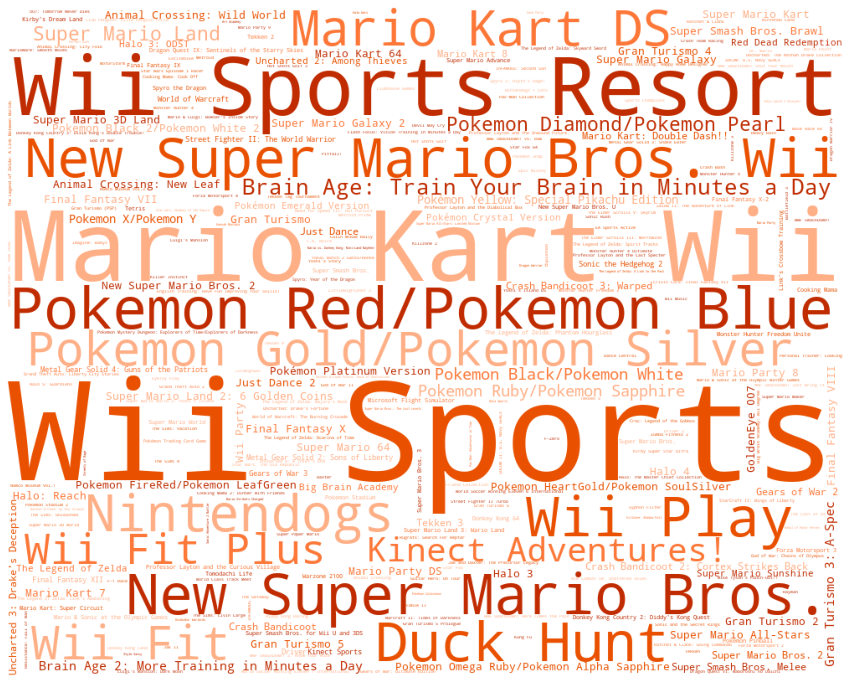

In [7]:
plt.figure(figsize=(15,15))
colormap=matplotlib.colors.ListedColormap(['#c02c00','#e95100','#fd7838', '#ffaf86'])
wc=WordCloud(background_color='white',
            width=1000,
            height=800,
            max_font_size=200,
            max_words=300,
            random_state=10,
            colormap=colormap).generate_from_frequencies(l)
plt.imshow(wc)
plt.axis('off')

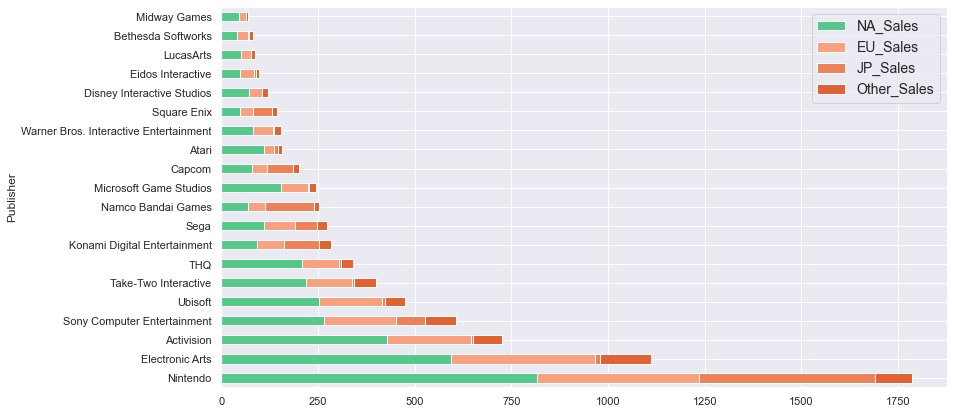

In [14]:
df.groupby('Publisher')[['NA_Sales',
                         'EU_Sales', 
                         'JP_Sales', 
                         'Other_Sales',
                         'Global_Sales']].sum().sort_values('Global_Sales',ascending=False).head(20)[['NA_Sales',
                                                                                                      'EU_Sales', 
                                                                                                      'JP_Sales',
                                                                                                      'Other_Sales']].plot(kind='barh',
                                                                                                                           stacked=True,
                                                                                                                          color=['#56c98a','#f7a181','#ed8259','#e16232'],
                                                                                                                          figsize=(13,7))
plt.legend(fontsize=14)

In [3]:
df[df.Name.duplicated()==True][['Name']]

,Name
23,Grand Theft Auto V
35,Call of Duty: Black Ops II
37,Call of Duty: Modern Warfare 3
40,Call of Duty: Black Ops
44,Grand Theft Auto V
...,...
16586,Secret Files 2: Puritas Cordis
16591,Myst IV: Revelation
16594,Men in Black II: Alien Escape
16595,SCORE International Baja 1000: The Official Game


In [4]:
df.drop_duplicates(subset=['Name']).groupby('Year')[['Name']].count()

,Name
Year,
1980.0,8
1981.0,43
1982.0,33
1983.0,16
1984.0,13
1985.0,13
1986.0,21
1987.0,15
1988.0,11


In [6]:
df0=df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df0['g_num']=df.drop_duplicates(subset=['Name']).groupby('Year')[['Name']].count()
df0

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,g_num
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,8
1981.0,33.40,1.96,0.00,0.32,43
1982.0,26.92,1.65,0.00,0.31,33
1983.0,7.76,0.80,8.10,0.14,16
1984.0,33.28,2.10,14.27,0.70,13
1985.0,33.73,4.74,14.56,0.92,13
1986.0,12.50,2.84,19.81,1.93,21
1987.0,8.46,1.41,11.63,0.20,15
1988.0,23.87,6.59,15.76,0.99,11


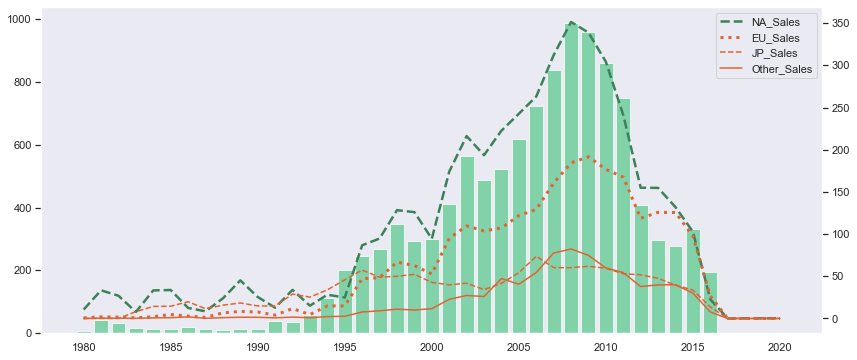

In [18]:
f,ax1=plt.subplots(figsize=(14,6))
ax1.bar(df0.index,df0['g_num'],color='#56c98a',alpha=.7)

ax2=ax1.twinx()
ax2.plot(df0.index,df0['NA_Sales'],color='#3c815a',linestyle='--',linewidth=2.5,label='NA_Sales')
ax2.plot(df0.index,df0['EU_Sales'],color='#e16232',linestyle=':',linewidth=3,label='EU_Sales')
ax2.plot(df0.index,df0['JP_Sales'],color='#e16232',linestyle='--',label='JP_Sales')
ax2.plot(df0.index,df0['Other_Sales'],color='#e16232',linestyle='-',label='Other_Sales')

plt.legend()